# 5、衡量线性回归法的指标：MSE、RMSE 和 MAE

+ 这一节我们要认识一个新的数据集：波士顿房价

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

波士顿房产数据

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 只使用一个特征，即下标为 5 ，即 “RM” 这个特征做简单线性回归

RM average number of rooms per dwelling 平均每户住房数

In [34]:
print(type(boston.data))
print(type(boston.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# 第 5 维数据，这是一个向量
x = boston.data[:, 5]

In [6]:
x.shape

(506,)

In [7]:
type(x)

numpy.ndarray

In [8]:
len(boston.data)

506

In [9]:
y = boston.target

In [10]:
y.shape

(506,)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


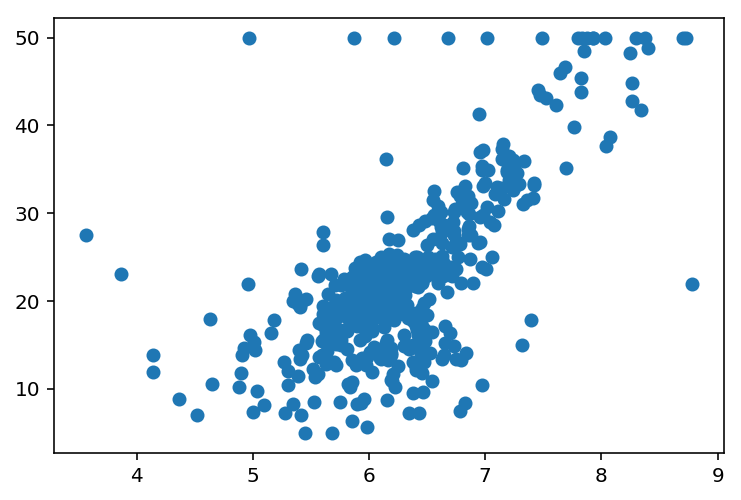

In [11]:
plt.scatter(x, y)
plt.show()

从上图中可以看到一些极端值的点，我们要把它们去掉。
这里要注意，筛选条件要一样，否则， $x$ 和 $y$ 就失去了对应关系。

+ **在这里 50 就是极端值**，我们要把它们去掉。

In [12]:
max(y)

50.0

## 数据清洗

In [13]:
x = x[y < 50.0]

In [14]:
y = y[y < 50.0]

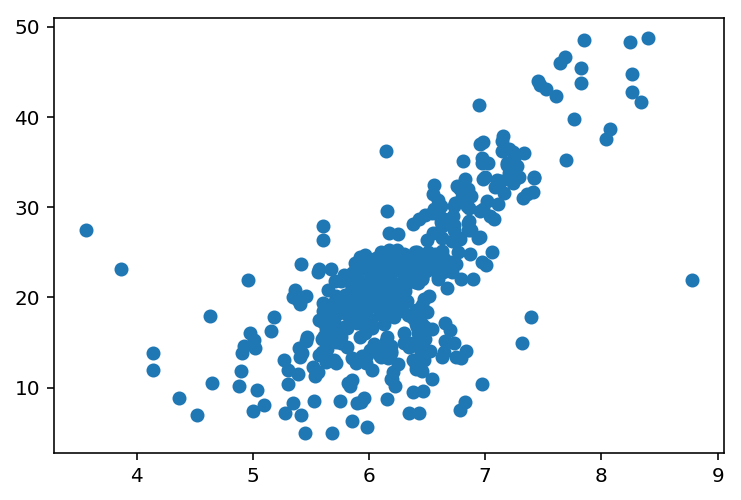

In [15]:
plt.scatter(x, y)
plt.show()

## 使用简单的线性回归法得到回归方程

In [16]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [17]:
x_train.shape

(392,)

In [18]:
x_test.shape

(98,)

In [19]:
from playML.SimpleLinearRegression2 import SimpleLinearRegression2

reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [20]:
reg.a_

7.8608543562689555

In [21]:
reg.b_

-27.459342806705543

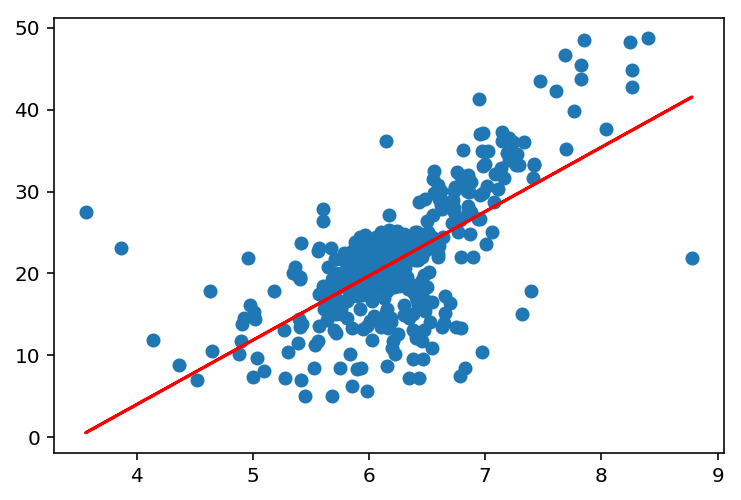

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='red')
plt.show()

In [23]:
y_predict = reg.predict(x_test)
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

### MSE(均方误差)

In [24]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

## RMSE

In [25]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE

In [26]:
mae_test = np.sum(np.abs(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

接下来，我们把这几个方法封装到 metrics.py 模块中去。

In [27]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [28]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [29]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [30]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## 在 scikit-learn 中计算 MSE 和 MAE

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [33]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873